You might wanna add precipitations as a feature!

In [4]:
# save as download_era5_2023_to_2025.py
import cdsapi
import os
import calendar

# Path to your custom .cdsapirc
rcfile_path = os.path.expanduser('~/Desktop/Projects/WeatherPrediction/.cdsapirc')

# Check if file exists
if not os.path.isfile(rcfile_path):
    raise FileNotFoundError(f"{rcfile_path} does not exist! Please create it with your CDS API key.")

# Read url and key from the .cdsapirc file
url = None
key = None
with open(rcfile_path, 'r') as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith('#'):
            continue
        if line.startswith('url:'):
            url = line.split(':', 1)[1].strip()
        elif line.startswith('key:'):
            key = line.split(':', 1)[1].strip()

if url is None or key is None:
    raise ValueError('Could not parse url and key from the .cdsapirc file')

# Initialize CDS API client
c = cdsapi.Client(url=url, key=key)
print("✅ CDS client initialized successfully!")

# --- CONFIG ---
out_dir = os.path.expanduser('~/Desktop/Projects/WeatherPrediction/era5_data')
os.makedirs(out_dir, exist_ok=True)

# ✅ Essential ERA5 variables for next-day weather prediction
variables = [
    '2m_temperature',                # Air temperature at 2m
    '2m_dewpoint_temperature',       # Dew point → humidity / moisture
    'mean_sea_level_pressure',       # Pressure → synoptic systems
    '10m_u_component_of_wind',       # East–west wind
    '10m_v_component_of_wind',       # North–south wind
    'total_cloud_cover',             # Cloudiness
    'total_precipitation',           # Rainfall
    'surface_solar_radiation_downwards',  # Incoming solar radiation
    'skin_temperature'               # Ground temperature
]

# Morocco bounding box [north, west, south, east]
area = [36.1, -9.8, 20.0, -0.9]

# --- LOOP THROUGH YEARS (Oct 2023 -> Sep 2025) ---
for year in range(2023, 2026):
    
    # Determine the months to download for each year in the range
    if year == 2023:
        # For 2023, we only want October to December
        months_to_download = range(10, 11)
    elif year == 2024:
        # For 2024, we want all months
        months_to_download = range(1, 13)
    elif year == 2025:
        # For 2025, we only want January to September
        months_to_download = range(1, 10)
    else:
        continue

    for month in months_to_download:
        outfile = os.path.join(out_dir, f"era5_{year}_{month:02d}.nc")

        if os.path.exists(outfile):
            print(f"✅ File already exists, skipping: {outfile}")
            continue
            
        # Get the number of days in the specific month and year
        num_days_in_month = calendar.monthrange(year, month)[1]
        days = [f"{d:02d}" for d in range(1, num_days_in_month + 1)]

        print(f"⬇️ Requesting ERA5 data for {year}-{month:02d} ...")
        try:
            c.retrieve(
                'reanalysis-era5-single-levels',
                {
                    'product_type': 'reanalysis',
                    'format': 'netcdf',
                    'variable': variables,
                    'year': str(year),
                    'month': f"{month:02d}",
                    'day': days,
                    'time': [f"{h:02d}:00" for h in range(0, 24)],
                    'area': area,
                },
                outfile
            )
            print(f"✅ Download completed: {outfile}")
        except Exception as e:
            print(f"❌ Error requesting {year}-{month:02d}: {e}")

print("\n🎉 All downloads finished.")

✅ CDS client initialized successfully!
✅ File already exists, skipping: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2023_10.nc
✅ File already exists, skipping: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_01.nc
⬇️ Requesting ERA5 data for 2024-02 ...


2025-10-14 20:21:31,524 INFO Request ID is 127553de-e253-4ad3-897a-8517de2ce968
2025-10-14 20:21:31,661 INFO status has been updated to accepted
2025-10-14 20:21:40,645 INFO status has been updated to successful


✅ Download completed: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_02.nc
✅ File already exists, skipping: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_03.nc
✅ File already exists, skipping: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_04.nc
✅ File already exists, skipping: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_05.nc
✅ File already exists, skipping: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_06.nc
✅ File already exists, skipping: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_07.nc
✅ File already exists, skipping: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_08.nc
✅ File already exists, skipping: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_09.nc
✅ File already exists, skipping: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_

2025-10-14 20:21:52,930 INFO Request ID is c0553238-d657-477f-8aff-5242ef25e126
2025-10-14 20:21:53,136 INFO status has been updated to accepted
2025-10-14 20:22:07,407 INFO status has been updated to successful


✅ Download completed: /home/senhajiahmed/Desktop/Projects/WeatherPrediction/era5_data/era5_2024_11.nc
⬇️ Requesting ERA5 data for 2024-12 ...


2025-10-14 20:22:28,671 INFO Request ID is 8f766c1a-de4f-4da4-b8e9-c29a38e12f43
2025-10-14 20:22:28,787 INFO status has been updated to accepted
2025-10-14 20:22:42,611 INFO status has been updated to running


KeyboardInterrupt: 

File is a zip archive. Searching for embedded .nc files...
Extracting data_stream-oper_stepType-instant.nc
Dataset loaded successfully!
<xarray.Dataset> Size: 32MB
Dimensions:     (valid_time: 687, latitude: 65, longitude: 36)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 5kB 2025-09-01 ... 2025-09-29T14:...
  * latitude    (latitude) float64 520B 36.0 35.75 35.5 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 288B -9.8 -9.55 -9.3 ... -1.55 -1.3 -1.05
    expver      (valid_time) <U4 11kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 6MB ...
    msl         (valid_time, latitude, longitude) float32 6MB ...
    u10         (valid_time, latitude, longitude) float32 6MB ...
    v10         (valid_time, latitude, longitude) float32 6MB ...
    tcc         (valid_time, latitude, longitude) float32 6MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range 

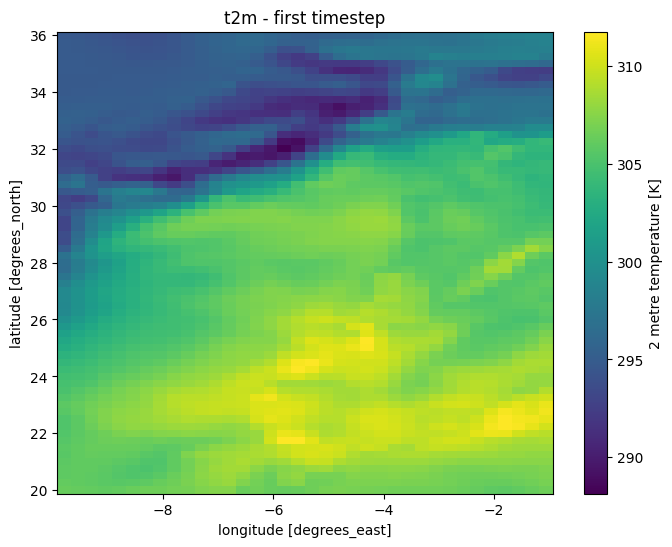


Plotting time series at lat=33.0, lon=-7.0...


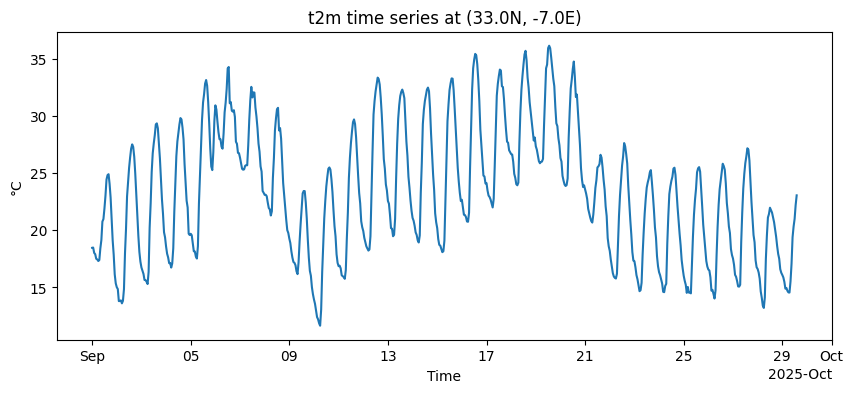

In [6]:
import zipfile
import tempfile
from pathlib import Path

import xarray as xr
import matplotlib.pyplot as plt

# -------------------------------
# CONFIG
# -------------------------------
file_path = Path("era5_data/era5_2025_09.nc")  # your downloaded ERA5 file
lat_pt, lon_pt = 33.0, -7.0  # point for time series (latitude, longitude)

# -------------------------------
# LOAD DATASET
# -------------------------------
if not file_path.exists():
    raise FileNotFoundError(file_path)

# Check if file is actually a zip (starts with PK..)
with open(file_path, 'rb') as f:
    sig = f.read(4)

if sig[:2] == b'PK':
    print('File is a zip archive. Searching for embedded .nc files...')
    with zipfile.ZipFile(file_path, 'r') as z:
        nc_files = [n for n in z.namelist() if n.lower().endswith('.nc')]
        if not nc_files:
            raise RuntimeError('Zip archive does not contain any .nc files')
        member = nc_files[0]
        print('Extracting', member)
        with tempfile.NamedTemporaryFile(suffix='.nc', delete=False) as tmp:
            tmp.write(z.read(member))
            tmp_path = Path(tmp.name)
        ds = xr.open_dataset(tmp_path)
else:
    print('File is not a zip; opening directly')
    ds = xr.open_dataset(file_path)

print('Dataset loaded successfully!')
print(ds)

# -------------------------------
# LIST VARIABLES
# -------------------------------
print("\nAvailable variables:", list(ds.data_vars.keys()))

# -------------------------------
# PLOT FIRST TIMESTEP MAP
# -------------------------------
first_var = list(ds.data_vars.keys())[0]  # e.g., 't2m'
print(f"\nPlotting first timestep of variable '{first_var}'...")
data_first = ds[first_var].isel(valid_time=0)

plt.figure(figsize=(8,6))
im = data_first.plot()
plt.title(f"{first_var} - first timestep")
plt.show()

# -------------------------------
# PLOT TIME SERIES AT A POINT
# -------------------------------
if 'latitude' in ds.dims and 'longitude' in ds.dims:
    print(f"\nPlotting time series at lat={lat_pt}, lon={lon_pt}...")
    ts = ds[first_var].sel(latitude=lat_pt, longitude=lon_pt, method='nearest')
    
    # Convert Kelvin to Celsius if temperature
    if 't2m' in first_var.lower():
        ts = ts - 273.15
    
    plt.figure(figsize=(10,4))
    ts.plot()
    plt.title(f"{first_var} time series at ({lat_pt}N, {lon_pt}E)")
    plt.ylabel('°C' if 't2m' in first_var.lower() else '')
    plt.xlabel('Time')
    plt.show()
else:
    print("Dataset does not have lat/lon dimensions; cannot plot point time series.")


I'm going to (1) create a short todo marking this summary task in-progress, then (2) fetch the latest notebook summary for test.ipynb so I can accurately report what was added. Expected outcome: todo created and notebook summary returned. 

Created 1 todo

Why/what/outcome: I'll fetch the latest summary of test.ipynb to ensure I reflect any manual changes the user made. Then I'll produce the resume. 

Retrieving Notebook summary.

I'll mark the summary todo completed so the task list is up to date, then provide a concise resume of what's in test.ipynb (cells and key variables). Expected outcome: todo marked completed and a short summary returned. 

Completed (1/1) *Summarize test.ipynb*

Here's a concise resume of what was done in test.ipynb (cells and purposes), based on the notebook summary and available variables.

Summary (cells in execution order)
1. Cell 1 — Load CSV and initial setup
   - Loads `era5_full_dataset.csv` with `parse_dates=['valid_time']`.
   - Imports pandas, numpy, os.
   - Verifies file exists.
   - Creates `df`.
   - Prints a confirmation when done.

2. Cell 2 — Inspect data
   - Prints `df.info()`, `df.head()`, and `df.describe()` to inspect columns, types, and summary statistics.

3. Cell 3 — Ensure time index
   - Sorts `df` by `valid_time` and sets `valid_time` as the DataFrame index (DatetimeIndex).
   - This prepares the DataFrame for time-based interpolation.

4. Cell 4 — Unit conversions
   - Converts temperatures from Kelvin to Celsius for columns: `2m_temperature`, `2m_dewpoint_temperature`, `skin_temperature` (if present).
   - Converts `mean_sea_level_pressure` from Pa to hPa (if present).

5. Cell 5 — Handle missing values
   - Prints counts of missing values (`df.isna().sum()`).
   - Interpolates isolated missing values using `df.interpolate(method='time', limit_direction='both')`.
   - Drops any remaining rows with missing values.
   - Confirms completion.

6. Cell 6 — Outliers / sanity checks
   - Filters temperatures to a realistic range (−123.15°C to 57.0°C), removing rows outside this range.
   - Clips `total_cloud_cover` to [0, 1].
   - Clips `total_precipitation` to be non-negative.
   - Clips wind component columns (`10m_u_component_of_wind`, `10m_v_component_of_wind`) to ±100 m/s.
   - Clips `surface_solar_radiation_downwards` to non-negative.
   - Confirms completion.

7. Cell 7 — Save cleaned CSV
   - Resets the index so `valid_time` becomes a column again.
   - Writes the cleaned DataFrame to era5_cleaned.csv.
   - Prints a success message and sets `cleaned_path`.

Key variables present in the notebook kernel
- `df`: the main pandas DataFrame (cleaned and ready).
- `csv_path`: path to the input CSV (`era5_full_dataset.csv`).
- `cleaned_path`: path to the output cleaned CSV (era5_cleaned.csv).
- `temp_col`, `wind_col`, `raw_col`, `mask`, `before_clip`, `changed`: variables used for checks and intermediate steps (from the kernel).

Notes and suggestions
- The notebook sets the DatetimeIndex before time interpolation, which is required for `method='time'` — good.
- If your dataset is large, consider chunked processing, or saving intermediate checkpoints to avoid re-running expensive conversion steps.
- If you want, I can:
  - Run the notebook and show the before/after missing-value counts.
  - Add a small cell that reports the number of rows/unique points removed by the outlier filters.
  - Add a reproducible header cell that pins package versions (e.g., pandas, xarray) and creates a lightweight `requirements.txt`.

If you'd like one of those follow-ups, tell me which and I’ll add it.

In [2]:
import zipfile
import tempfile
from pathlib import Path
import xarray as xr
import pandas as pd

# -------------------------------
# CONFIG
# -------------------------------
file_path = Path("era5_data/era5_2025_09.nc")  # your downloaded ERA5 file
output_csv = "era5_full_dataset.csv"

# -------------------------------
# LOAD DATASET (handle zip or nc)
# -------------------------------
if not file_path.exists():
    raise FileNotFoundError(file_path)

with open(file_path, 'rb') as f:
    sig = f.read(4)

if sig[:2] == b'PK':
    print('File is a zip archive. Extracting .nc...')
    with zipfile.ZipFile(file_path, 'r') as z:
        nc_files = [n for n in z.namelist() if n.lower().endswith('.nc')]
        if not nc_files:
            raise RuntimeError('Zip archive does not contain any .nc files')
        member = nc_files[0]
        with tempfile.NamedTemporaryFile(suffix='.nc', delete=False) as tmp:
            tmp.write(z.read(member))
            tmp_path = Path(tmp.name)
        ds = xr.open_dataset(tmp_path)
else:
    print('File is not a zip; opening directly')
    ds = xr.open_dataset(file_path)

print('Dataset loaded successfully!')

# -------------------------------
# STACK LAT/LON and convert to DataFrame
# -------------------------------
print('Converting dataset to DataFrame...')

# Flatten lat/lon into single "points" dimension
df = ds.to_dataframe().reset_index()

# Convert temperature from K to °C for common variables
for var in ['t2m']:
    if var in df.columns:
        df[var] = df[var] - 273.15

# -------------------------------
# SAVE TO CSV
# -------------------------------
print(f'Saving full dataset to CSV: {output_csv} ...')
df.to_csv(output_csv, index=False)
print('Done!')


File is a zip archive. Extracting .nc...
Dataset loaded successfully!
Converting dataset to DataFrame...
Saving full dataset to CSV: era5_full_dataset.csv ...
Done!


In [9]:
# Extract unique latitude/longitude pairs and save to CSV
import zipfile
import tempfile
from pathlib import Path
import xarray as xr
import pandas as pd

# Path to ERA5 file (NetCDF or a zip containing a .nc)
file_path = Path("era5_data/era5_2025_09.nc")
output_csv = "era5_lat_lon.csv"

if not file_path.exists():
    raise FileNotFoundError(f"ERA5 file not found: {file_path}")

# Open dataset (handle zip that contains a .nc)
with open(file_path, 'rb') as f:
    sig = f.read(4)

if sig[:2] == b'PK':
    print('Found zip archive; extracting .nc member...')
    with zipfile.ZipFile(file_path, 'r') as z:
        nc_files = [n for n in z.namelist() if n.lower().endswith('.nc')]
        if not nc_files:
            raise RuntimeError('Zip archive does not contain any .nc files')
        member = nc_files[0]
        with tempfile.NamedTemporaryFile(suffix='.nc', delete=False) as tmp:
            tmp.write(z.read(member))
            tmp_path = Path(tmp.name)
        ds = xr.open_dataset(tmp_path)
else:
    ds = xr.open_dataset(file_path)

# Determine latitude/longitude coordinate names (common variants)
lat_names = [n for n in ds.coords if 'lat' in n.lower()]
lon_names = [n for n in ds.coords if 'lon' in n.lower()]

if not lat_names or not lon_names:
    # Try dimensions if coords not found
    lat_names = [n for n in ds.dims if 'lat' in n.lower()]
    lon_names = [n for n in ds.dims if 'lon' in n.lower()]

if not lat_names or not lon_names:
    raise RuntimeError('Could not find latitude/longitude coordinates in the dataset')

lat_name = lat_names[0]
lon_name = lon_names[0]

print(f'Using latitude coord: {lat_name}, longitude coord: {lon_name}')

# Extract coordinate values
lats = ds[lat_name].values
lons = ds[lon_name].values

# Create grid of unique lat/lon pairs
import numpy as np
LON, LAT = np.meshgrid(lons, lats)
flat_lat = LAT.ravel()
flat_lon = LON.ravel()

df = pd.DataFrame({
    'latitude': flat_lat,
    'longitude': flat_lon
})

# Drop duplicates just in case (and reset index)
df = df.drop_duplicates().reset_index(drop=True)

# Save to CSV
df.to_csv(output_csv, index=False)
print(f'Saved unique latitude/longitude pairs to {output_csv} (rows: {len(df)})')


Found zip archive; extracting .nc member...
Using latitude coord: latitude, longitude coord: longitude
Saved unique latitude/longitude pairs to era5_lat_lon.csv (rows: 2340)
